In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
def dividing1(image,n):
    if (image.shape[1]%n) == 0:
        if (image.shape[1]/n)%2 == 0:
            m = int(image.shape[1]/n)
            mid_overlap = int(m/2)
            images = []
            x1 = 0
            x2 = m + mid_overlap
            while(x2 != (image.shape[1] + m - mid_overlap)):
                crop_image = image[:,x1:x2,:]
                images.append(crop_image)
                x1 = x1 + (m - mid_overlap)
                x2 = x2 + (m - mid_overlap)
            return images    
        else:
            print('n is not correct!')
            
    else:
        print('n is not correct')
def dividing2(images,n):
    croped_images = []
    for i in range(len(images)):
        
        if (images[i].shape[0])%n == 0:
            
            if (images[i].shape[0]/n)%2 == 0:
                m = int(images[i].shape[0]/n)
                mid_overlap = int(m/2)
                pictures = []
                y1 = 0
                y2 = m + mid_overlap
                while(y2 != (image.shape[0] + m - mid_overlap)):
                    crop_image = images[i][y1:y2,:,:]
                    pictures.append(crop_image)
                    y1 = y1 + m - mid_overlap
                    y2 = y2 + m - mid_overlap
               
                croped_images.append(pictures)
            else:
                print('n is not correct1')
        else:
            print('n is not correct!')
    return croped_images
        
class Stitcher1:
    def __init__(self):
        self.isv3 = imutils.is_cv3(or_better=True)
        
        
    def stitch(self,images,ratio=0.75,reprojThresh=4.0,showMatches=False):
        (imageB,imageA) = images
        (kpsA,featuresA) = self.detectAndDescribe(imageA)
        (kpsB,featuresB) = self.detectAndDescribe(imageB)
        M = self.matchKeypoints(kpsA,kpsB,featuresA,featuresB,ratio,reprojThresh)
        if M is None:
            return None
        
        (matches,H,status) = M
        result = cv2.warpPerspective(imageA,H,( imageA.shape[1]  ,imageB.shape[0] + imageA.shape[0]))
        result[0:imageB.shape[0],0:imageB.shape[1]] = imageB
        
        if showMatches:
            vis = self.drawMatches(imageA,imageB,kpsA,kpsB,matches,status)
            return (result,vis)
        
        return result
    def detectAndDescribe(self,image):
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        if self.isv3:
            descriptor = cv2.xfeatures2d.SIFT_create()
            (kps,features) = descriptor.detectAndCompute(image,None)
        else:
            detector = cv2.FeatureDetector_create('SIFT')
            kps = detector.detect(gray)
            extractor = cv2.DescriptorExtractor_create('SIFT')
            (kps,features) = extractor.compute(gray,kps)
            
        kps = np.float32([kp.pt for kp in kps])
        return (kps,features)
        
        
        
    def matchKeypoints(self,kpsA,kpsB,featuresA,featuresB,ratio,reprojThresh):
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA,featuresB,2)
        matches = []
        for m in rawMatches:
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx,m[0].queryIdx))
                
        if len(matches) > 1:
            ptsA = np.float32([kpsA[i] for (_,i) in matches])
            ptsB = np.float32([kpsB[i] for (i,_) in matches])
            
            (H,status) = cv2.findHomography(ptsA,ptsB,cv2.RANSAC,reprojThresh)
        
            return (matches,H,status)
        
        return None
    
    
    def drawMatches(self,imageA,imageB,kpsA,kpsB,matches,status):
        (hA,wA) = imageA.shape[:2]
        (hB,wB) = imageB.shape[:2]
        vis = np.zeros((max(hA,hB),wA+wB , 3),dtype="uint8")
        vis[0:hA,0:wA] = imageA
        vis[0:hB,wA:] = imageB
        
        for((trainIdx,queryIdx),s) in zip(matches,status):
            ptA = (int(kpsA[queryIdx][0]),int(kpsA[queryIdx][1]))
            ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
            cv2.line(vis,ptA,ptB,(0,255,0),1)
            
        return vis
class Stitcher2:
    def __init__(self):
        self.isv3 = imutils.is_cv3(or_better=True)
        
        
    def stitch(self,images,ratio=0.75,reprojThresh=4.0,showMatches=False):
        (imageB,imageA) = images
        (kpsA,featuresA) = self.detectAndDescribe(imageA)
        (kpsB,featuresB) = self.detectAndDescribe(imageB)
        M = self.matchKeypoints(kpsA,kpsB,featuresA,featuresB,ratio,reprojThresh)
        if M is None:
            return None
        
        (matches,H,status) = M
        result = cv2.warpPerspective(imageA,H,( imageA.shape[1] + imageB.shape[1] ,imageA.shape[0]))
        result[0:imageB.shape[0],0:imageB.shape[1]] = imageB
        
        if showMatches:
            vis = self.drawMatches(imageA,imageB,kpsA,kpsB,matches,status)
            return (result,vis)
        
        return result
    def detectAndDescribe(self,image):
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        if self.isv3:
            descriptor = cv2.xfeatures2d.SIFT_create()
            (kps,features) = descriptor.detectAndCompute(image,None)
        else:
            detector = cv2.FeatureDetector_create('SIFT')
            kps = detector.detect(gray)
            extractor = cv2.DescriptorExtractor_create('SIFT')
            (kps,features) = extractor.compute(gray,kps)
            
        kps = np.float32([kp.pt for kp in kps])
        return (kps,features)
        
        
        
    def matchKeypoints(self,kpsA,kpsB,featuresA,featuresB,ratio,reprojThresh):
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA,featuresB,2)
        matches = []
        for m in rawMatches:
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx,m[0].queryIdx))
                
        if len(matches) > 1:
            ptsA = np.float32([kpsA[i] for (_,i) in matches])
            ptsB = np.float32([kpsB[i] for (i,_) in matches])
            
            (H,status) = cv2.findHomography(ptsA,ptsB,cv2.RANSAC,reprojThresh)
        
            return (matches,H,status)
        
        return None
    
    
    def drawMatches(self,imageA,imageB,kpsA,kpsB,matches,status):
        (hA,wA) = imageA.shape[:2]
        (hB,wB) = imageB.shape[:2]
        vis = np.zeros((max(hA,hB),wA+wB , 3),dtype="uint8")
        vis[0:hA,0:wA] = imageA
        vis[0:hB,wA:] = imageB
        
        for((trainIdx,queryIdx),s) in zip(matches,status):
            ptA = (int(kpsA[queryIdx][0]),int(kpsA[queryIdx][1]))
            ptB = (int(kpsB[trainIdx][0]) + wA, int(kpsB[trainIdx][1]))
            cv2.line(vis,ptA,ptB,(0,255,0),1)
            
        return vis
def mapping1(croped_images,images):
    results = []
    for i in range(len(images)):
        pictures = croped_images[i]
        result = pictures[0]
        for i in range(len(pictures) - 1):
            imageA = result
            imageB = pictures[i + 1]
            stitcher = Stitcher1()
            (a,b) = stitcher.stitch([imageA,imageB],showMatches=True)
            y = 0
            for i in range(a.shape[0]):
                if np.sum(a[i,:,:]) == 0:
                    y = i
                    break
            result = a[0:y,:,:]
        results.append(result)
    return results
def mapping2(results):
    result = results[0]
    for i in range(len(results) - 1):
        imageA = result
        imageB = results[i+1]
        imageA = imutils.resize(imageA)
        imageB = imutils.resize(imageB)
        stitcher = Stitcher2()
        (a,b) = stitcher.stitch([imageA,imageB],showMatches=True)
        x = 0
        for i in range(a.shape[1]):
            if np.sum(a[:,i,:]) == 0:
                x = i
                break
        result = a[:,0:x-5,:]
    return result


In [2]:
image = cv2.imread('streets.jpg')
images = dividing1(image,3)
croped_images = dividing2(images,3)
results = mapping1(croped_images,images)
results2 = []
minimum = results[0].shape[0]
for i in range(len(results)):
    if results[i].shape[0] < minimum:
        minimum = results[i].shape[0]
for i in range(len(results)):
    results[i] = results[i][0:minimum,:,:]
    results2.append(results[i])
result = mapping2(results2)

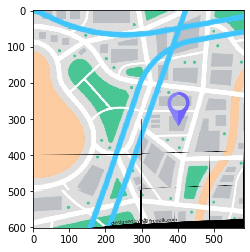

In [3]:
plt.imshow(result)

In [5]:
image = cv2.imread('streets.jpg')
images = dividing1(image,4)
croped_images = dividing2(images,2)
results = mapping1(croped_images,images)
results2 = []
minimum = results[0].shape[0]
for i in range(len(results)):
    if results[i].shape[0] < minimum:
        minimum = results[i].shape[0]
for i in range(len(results)):
    results[i] = results[i][0:minimum,:,:]
    results2.append(results[i])
result = mapping2(results2)

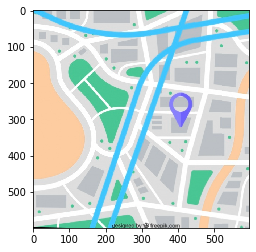

In [7]:
plt.imshow(result)

In [11]:
image = cv2.imread('streets.jpg')
images = dividing1(image,2)
croped_images = dividing2(images,3)
results = mapping1(croped_images,images)
results2 = []
minimum = results[0].shape[0]
for i in range(len(results)):
    if results[i].shape[0] < minimum:
        minimum = results[i].shape[0]
for i in range(len(results)):
    results[i] = results[i][0:minimum,:,:]
    results2.append(results[i])
result = mapping2(results2)

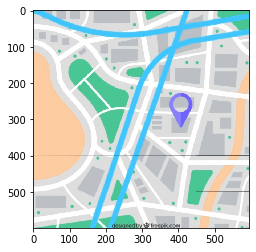

In [12]:
plt.imshow(result)